In [3]:
import pandas as pd
import seaborn as sns
import tabulate
import numpy as np

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_25479/4065668965.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
%load_ext jupyter_black

ModuleNotFoundError: No module named 'jupyter_black'

In [8]:
FN = "Plants datasets - Sheet1.csv'"
FN = "Plants datasets.xlsx"
# ds = pd.read_csv("./plants-dataset-spreadsheet.csv")
# ds = pd.read_csv(FN)
ds = pd.read_excel(FN, sheet_name="Tidy")

In [9]:
ds

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,validation,test,num_classes,num_images_full,num_classes_full,additional_metadata,type,super_classes,dataset_parts,is_split,class_imbalance,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",1.0,field,0.0,306146.0,True,243916.0,31118.0,31112.0,1081.0,-1.0,-1.0,organ,mixed,plants,0,"train,val,test",1,user-generated,CC-BY-4.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,1.0,field,0.0,1714213.0,True,1714213.0,0.0,0.0,15490.0,-1.0,-1.0,GBIF_a_lot,mixed,plants,0,0,?,user-generated,CC-BY-4.0,0.0,1.0,0.0,1.0,3.0,the big dataset with everything,NaN
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,1.0,field,0.0,12142287.0,True,12142287.0,NaN,NaN,12572.0,-1.0,-1.0,NaN,mixed,NaN,0,0,1,user-generated,NaN,0.0,1.0,0.0,1.0,3.0,NaN,NaN
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC-BY-4.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,1.0,field,0.0,196613.0,True,158407.0,38206.0,0.0,2101.0,675170.0,5089.0,"bbox?,kingdom,GBIF,latitude,longitude,date,use...",mixed,"Plantae,Insecta,Aves,Reptilia,Mammalia,Fungi,A...",0,"train,val,test?",1,user-generated,custom:https://github.com/visipedia/inat_comp/...,1.0,0.0,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,1.0,field,0.0,127551.0,True,118800.0,8751.0,0.0,2917.0,461939.0,8142.0,"latitude,longitude,date, kingdom, phylum, clas...",mixed,"Plantae, Insecta, Aves, Actinopterygii, Fungi,...",0,"train,val,test?",1,user-generated,custom,0.0,0.0,0.0,1.0,2.0,NaN,NaN
6,iNat2019,iNat2019,NaN,https://github.com/visipedia/inat_comp/tree/ma...,1.0,field,0.0,NaN,False,NaN,NaN,NaN,NaN,268243.0,1010.0,"date, kingdom, phylum, class, order, family, g...",mixed,NaN,0,"train,val,test?",1,user-generated,custom,0.0,0.0,0.0,0.0,2.0,REMAINING: look at how many plants there are a...,NaN
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,1.0,field,0.0,1191412.0,True,1148702.0,42710.0,0.0,4271.0,2786843.0,10000.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Plants, Insects, Birds, Fungi, Reptiles, Mamma...",0,"train,val,test?",1,user-generated,custom,0.0,0.0,0.0,1.0,2.0,location data can be null;,NaN
8,iNaturalist-300k,iNaturalist-300k,NaN,NaN,1.0,field,0.0,526584.0,True,421294.0,52726.0,52564.0,991.0,-1.0,-1.0,taxonomy,mixed,NaN,NaN,"train,val,test?",1,user-generated,"CC-0,CC-BY,CC-BY-NC",1.0,0.0,0.0,1.0,5.0,our dataset ^^,NaN
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,1.0,field,0.0,24211423.0,True,24211423.0,0.0,0.0,113660.0,62664638.0,332864.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Animalia, Archaea, Bacteria, Chromista, Fungi,...",0,0,1,user-generated,"CC-0,CC-BY,CC-BY-NC",0.0,1.0,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN


In [10]:
# Flora incognita - nothing known
# ds.drop(index=11, inplace=True)

In [11]:
BIN_COLS = [
    "is_available",
    "is_composed",
    "baseline_available",
    "constantly_updated",
]  # , "is_split"]
NUM_COLS = [
    "num_images",
    "training",
    "validation",
    "test",
    "num_classes",
    "num_images_full",
    "num_classes_full",
    "IMPORTANT",
]

In [12]:
ds[BIN_COLS] = ds[BIN_COLS].astype(bool)
ds[NUM_COLS] = ds[NUM_COLS].astype(int, errors="ignore")
ds["not_train"] = ds["test"] + ds["validation"]
ds["is_split"] = ds["not_train"].astype(bool)
ds

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,validation,test,num_classes,num_images_full,num_classes_full,additional_metadata,type,super_classes,dataset_parts,is_split,class_imbalance,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,31118.0,31112.0,1081.0,-1.0,-1.0,organ,mixed,plants,0,True,1,user-generated,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,0.0,0.0,15490.0,-1.0,-1.0,GBIF_a_lot,mixed,plants,0,False,?,user-generated,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,NaN,NaN,12572.0,-1.0,-1.0,NaN,mixed,NaN,0,True,1,user-generated,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,CC-BY-4.0,False,True,NaN,0.0,0.0,NaN,NaN,NaN
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,38206.0,0.0,2101.0,675170.0,5089.0,"bbox?,kingdom,GBIF,latitude,longitude,date,use...",mixed,"Plantae,Insecta,Aves,Reptilia,Mammalia,Fungi,A...",0,True,1,user-generated,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,8751.0,0.0,2917.0,461939.0,8142.0,"latitude,longitude,date, kingdom, phylum, clas...",mixed,"Plantae, Insecta, Aves, Actinopterygii, Fungi,...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,NaN,NaN,8751.0
6,iNat2019,iNat2019,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,NaN,False,NaN,NaN,NaN,NaN,268243.0,1010.0,"date, kingdom, phylum, class, order, family, g...",mixed,NaN,0,True,1,user-generated,custom,False,False,0.0,0.0,2.0,REMAINING: look at how many plants there are a...,NaN,NaN
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,42710.0,0.0,4271.0,2786843.0,10000.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Plants, Insects, Birds, Fungi, Reptiles, Mamma...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0
8,iNaturalist-300k,iNaturalist-300k,NaN,NaN,True,field,False,526584.0,True,421294.0,52726.0,52564.0,991.0,-1.0,-1.0,taxonomy,mixed,NaN,NaN,True,1,user-generated,"CC-0,CC-BY,CC-BY-NC",True,False,0.0,1.0,5.0,our dataset ^^,NaN,105290.0
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,0.0,0.0,113660.0,62664638.0,332864.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Animalia, Archaea, Bacteria, Chromista, Fungi,...",0,False,1,user-generated,"CC-0,CC-BY,CC-BY-NC",False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0


In [13]:
MAP_STAND_DICT = {0.0: "Not standardized", 1.0: "Standardized", 2.0: "N/A"}
ds.loc[:, "is_standardized_parsed"] = ds.is_standardized.apply(
    lambda x: MAP_STAND_DICT.get(x, "None")
)
ds

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,validation,test,num_classes,num_images_full,num_classes_full,additional_metadata,type,super_classes,dataset_parts,is_split,class_imbalance,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,31118.0,31112.0,1081.0,-1.0,-1.0,organ,mixed,plants,0,True,1,user-generated,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,0.0,0.0,15490.0,-1.0,-1.0,GBIF_a_lot,mixed,plants,0,False,?,user-generated,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,NaN,NaN,12572.0,-1.0,-1.0,NaN,mixed,NaN,0,True,1,user-generated,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,CC-BY-4.0,False,True,NaN,0.0,0.0,NaN,NaN,NaN,None
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,38206.0,0.0,2101.0,675170.0,5089.0,"bbox?,kingdom,GBIF,latitude,longitude,date,use...",mixed,"Plantae,Insecta,Aves,Reptilia,Mammalia,Fungi,A...",0,True,1,user-generated,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,8751.0,0.0,2917.0,461939.0,8142.0,"latitude,longitude,date, kingdom, phylum, clas...",mixed,"Plantae, Insecta, Aves, Actinopterygii, Fungi,...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,NaN,NaN,8751.0,Not standardized
6,iNat2019,iNat2019,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,NaN,False,NaN,NaN,NaN,NaN,268243.0,1010.0,"date, kingdom, phylum, class, order, family, g...",mixed,NaN,0,True,1,user-generated,custom,False,False,0.0,0.0,2.0,REMAINING: look at how many plants there are a...,NaN,NaN,Not standardized
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,42710.0,0.0,4271.0,2786843.0,10000.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Plants, Insects, Birds, Fungi, Reptiles, Mamma...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0,Not standardized
8,iNaturalist-300k,iNaturalist-300k,NaN,NaN,True,field,False,526584.0,True,421294.0,52726.0,52564.0,991.0,-1.0,-1.0,taxonomy,mixed,NaN,NaN,True,1,user-generated,"CC-0,CC-BY,CC-BY-NC",True,False,0.0,1.0,5.0,our dataset ^^,NaN,105290.0,Not standardized
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,0.0,0.0,113660.0,62664638.0,332864.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Animalia, Archaea, Bacteria, Chromista, Fungi,...",0,False,1,user-generated,"CC-0,CC-BY,CC-BY-NC",False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0,Not standardized


In [14]:
def num_splits(row):
    num_splits = 1
    if row.test and row.test > 0:
        num_splits += 1
    if row.validation and row.validation > 0:
        num_splits += 1
    if row["name"] == "Flora Incognita":
        num_splits = 0
    return num_splits


ds["num_splits"] = ds.apply(num_splits, axis=1)
ds.head()

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,validation,test,num_classes,num_images_full,num_classes_full,additional_metadata,type,super_classes,dataset_parts,is_split,class_imbalance,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed,num_splits
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,31118.0,31112.0,1081.0,-1.0,-1.0,organ,mixed,plants,0,True,1,user-generated,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized,3
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,0.0,0.0,15490.0,-1.0,-1.0,GBIF_a_lot,mixed,plants,0,False,?,user-generated,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized,1
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,NaN,NaN,12572.0,-1.0,-1.0,NaN,mixed,NaN,0,True,1,user-generated,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized,1
3,Flora-On,Flora-On,NaN,https://flora-on.pt/,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,CC-BY-4.0,False,True,NaN,0.0,0.0,NaN,NaN,NaN,None,1
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,38206.0,0.0,2101.0,675170.0,5089.0,"bbox?,kingdom,GBIF,latitude,longitude,date,use...",mixed,"Plantae,Insecta,Aves,Reptilia,Mammalia,Fungi,A...",0,True,1,user-generated,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized,2


In [15]:
dsp = ds.dropna(subset=["num_images", "num_classes"], inplace=False)
dsp

,name,short,doi,link,is_available,aquisition_protocol,is_composed,num_images,num_images_splits_sum,training,validation,test,num_classes,num_images_full,num_classes_full,additional_metadata,type,super_classes,dataset_parts,is_split,class_imbalance,generation_type,license,baseline_available,constantly_updated,is_standardized,DONE,IMPORTANT,comments,TODO,not_train,is_standardized_parsed,num_splits
0,Pl@ntNet-300k,Pl@ntNet-300k,https://doi.org/10.5281/zenodo.5645731,"https://zenodo.org/record/5645731, https://git...",True,field,False,306146.0,True,243916.0,31118.0,31112.0,1081.0,-1.0,-1.0,organ,mixed,plants,0,True,1,user-generated,CC-BY-4.0,True,False,0.0,1.0,5.0,NaN,NaN,62230.0,Not standardized,3
1,Pl@ntNet observations,Pl@ntNet observations,DOI10.15468/gtebaa,https://www.gbif.org/dataset/7a3679ef-5582-4aa...,True,field,False,1714213.0,True,1714213.0,0.0,0.0,15490.0,-1.0,-1.0,GBIF_a_lot,mixed,plants,0,False,?,user-generated,CC-BY-4.0,False,True,0.0,1.0,3.0,the big dataset with everything,NaN,0.0,Not standardized,1
2,Pl@ntNet automatically identified occurrences,Pl@ntNet autom. ident. occ.,https://doi.org/10.15468/mma2ec,https://doi.org/10.15468/mma2ec,True,field,False,12142287.0,True,12142287.0,NaN,NaN,12572.0,-1.0,-1.0,NaN,mixed,NaN,0,True,1,user-generated,NaN,False,True,0.0,1.0,3.0,NaN,NaN,NaN,Not standardized,1
4,iNat2017,iNat2017,https://doi.org/10.48550/arXiv.1707.06642,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,196613.0,True,158407.0,38206.0,0.0,2101.0,675170.0,5089.0,"bbox?,kingdom,GBIF,latitude,longitude,date,use...",mixed,"Plantae,Insecta,Aves,Reptilia,Mammalia,Fungi,A...",0,True,1,user-generated,custom:https://github.com/visipedia/inat_comp/...,True,False,0.0,1.0,2.0,"2017, has plants and other things; train/val i...",NaN,38206.0,Not standardized,2
5,iNat2018,iNat2018,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,127551.0,True,118800.0,8751.0,0.0,2917.0,461939.0,8142.0,"latitude,longitude,date, kingdom, phylum, clas...",mixed,"Plantae, Insecta, Aves, Actinopterygii, Fungi,...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,NaN,NaN,8751.0,Not standardized,2
7,iNat2021,iNat2021,NaN,https://github.com/visipedia/inat_comp/tree/ma...,True,field,False,1191412.0,True,1148702.0,42710.0,0.0,4271.0,2786843.0,10000.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Plants, Insects, Birds, Fungi, Reptiles, Mamma...",0,True,1,user-generated,custom,False,False,0.0,1.0,2.0,location data can be null;,NaN,42710.0,Not standardized,2
8,iNaturalist-300k,iNaturalist-300k,NaN,NaN,True,field,False,526584.0,True,421294.0,52726.0,52564.0,991.0,-1.0,-1.0,taxonomy,mixed,NaN,NaN,True,1,user-generated,"CC-0,CC-BY,CC-BY-NC",True,False,0.0,1.0,5.0,our dataset ^^,NaN,105290.0,Not standardized,3
9,iNaturalist Research-grade Observations,iNat Research-grade,DOI10.15468/ab3s5x,https://www.gbif.org/occurrence/charts?dataset...,True,field,False,24211423.0,True,24211423.0,0.0,0.0,113660.0,62664638.0,332864.0,"latitude,longitude,location_uncertainty,date, ...",mixed,"Animalia, Archaea, Bacteria, Chromista, Fungi,...",0,False,1,user-generated,"CC-0,CC-BY,CC-BY-NC",False,True,0.0,1.0,2.0,the 'best' pics from the iNaturalist ds,NaN,0.0,Not standardized,1
10,iNaturalist,iNaturalist,NaN,https://www.inaturalist.org/taxa/47126-Plantae...,True,field,False,57480960.0,True,57480960.0,0.0,0.0,147776.0,140663548.0,429145.0,"latitude?,longitude?,location_uncertainty?,dat...",mixed,"Animalia, Archaea, Bacteria, Chromista, Fungi,...",0,False,1,user-generated,custom,False,True,0.0,1.0,1.0,all of iNaturalist,NaN,0.0,Not standardized,1
11,Plant Seedlings Dataset,Plant Seedlings Dataset,https://doi.org/10.48550/arXiv.1711.05458,https://vision.eng.au.dk/plant-seedlings-dataset/,True,lab,False,4750.0,True,4750.0,0.0,0.0,12.0,-1.0,-1.0,segmentation?,pic_from_top,plants,0,False,0,lab,CC-BY-SA,False,False,1.0,1.0,1.0,"~960 plants, 4750 indiv. pictures in diff grow...",NaN,0.0,Standardized,1


In [16]:
len(ds[ds.DONE == 1])

22

In [17]:
import matplotlib.pyplot as plt
import adjustText

sns.set_style("white")

Text(0.5, 1.0, 'Some datasets, in red: not easily downloadable')

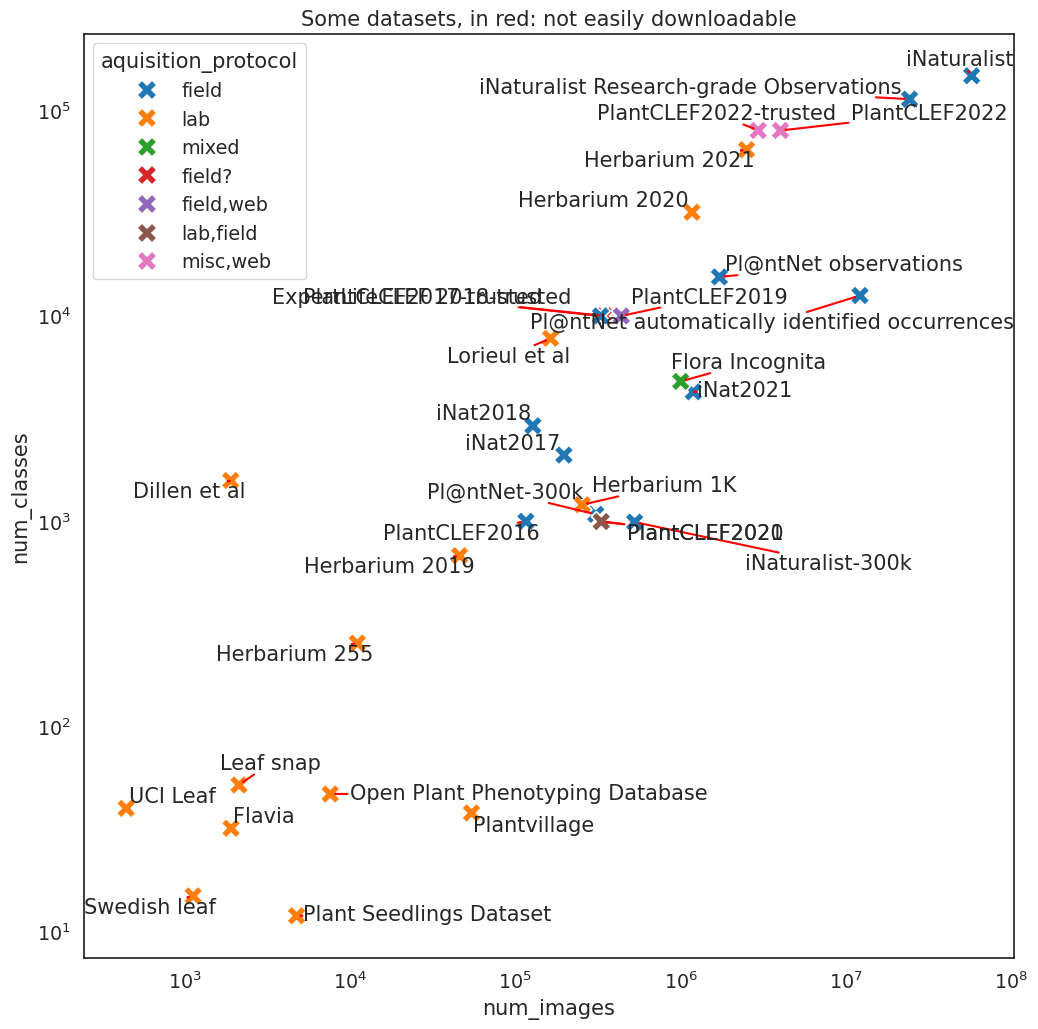

In [18]:
sns.set_context("notebook", font_scale=1.25)
ax = sns.scatterplot(
    data=dsp,
    x="num_images",
    y="num_classes",
    # style="is_available",
    # hue="type",
    hue="aquisition_protocol",
    s=200,
    # marker="$x$",
    marker="X",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(12, 12)

texts = list()
for i, row in dsp.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes,
        row["name"],
        ha="center",
        va="center",
        # color="black" if row["is_available"] else "red",
    )
    texts.append(txt)

adjustText.adjust_text(
    texts,
    arrowprops=dict(
        arrowstyle="->",
        # arrowstyle="-|>",
        color="red",
        lw=1.5,
    ),
)

ax.set_title("Some datasets, in red: not easily downloadable")

In [19]:
from matplotlib.markers import MarkerStyle

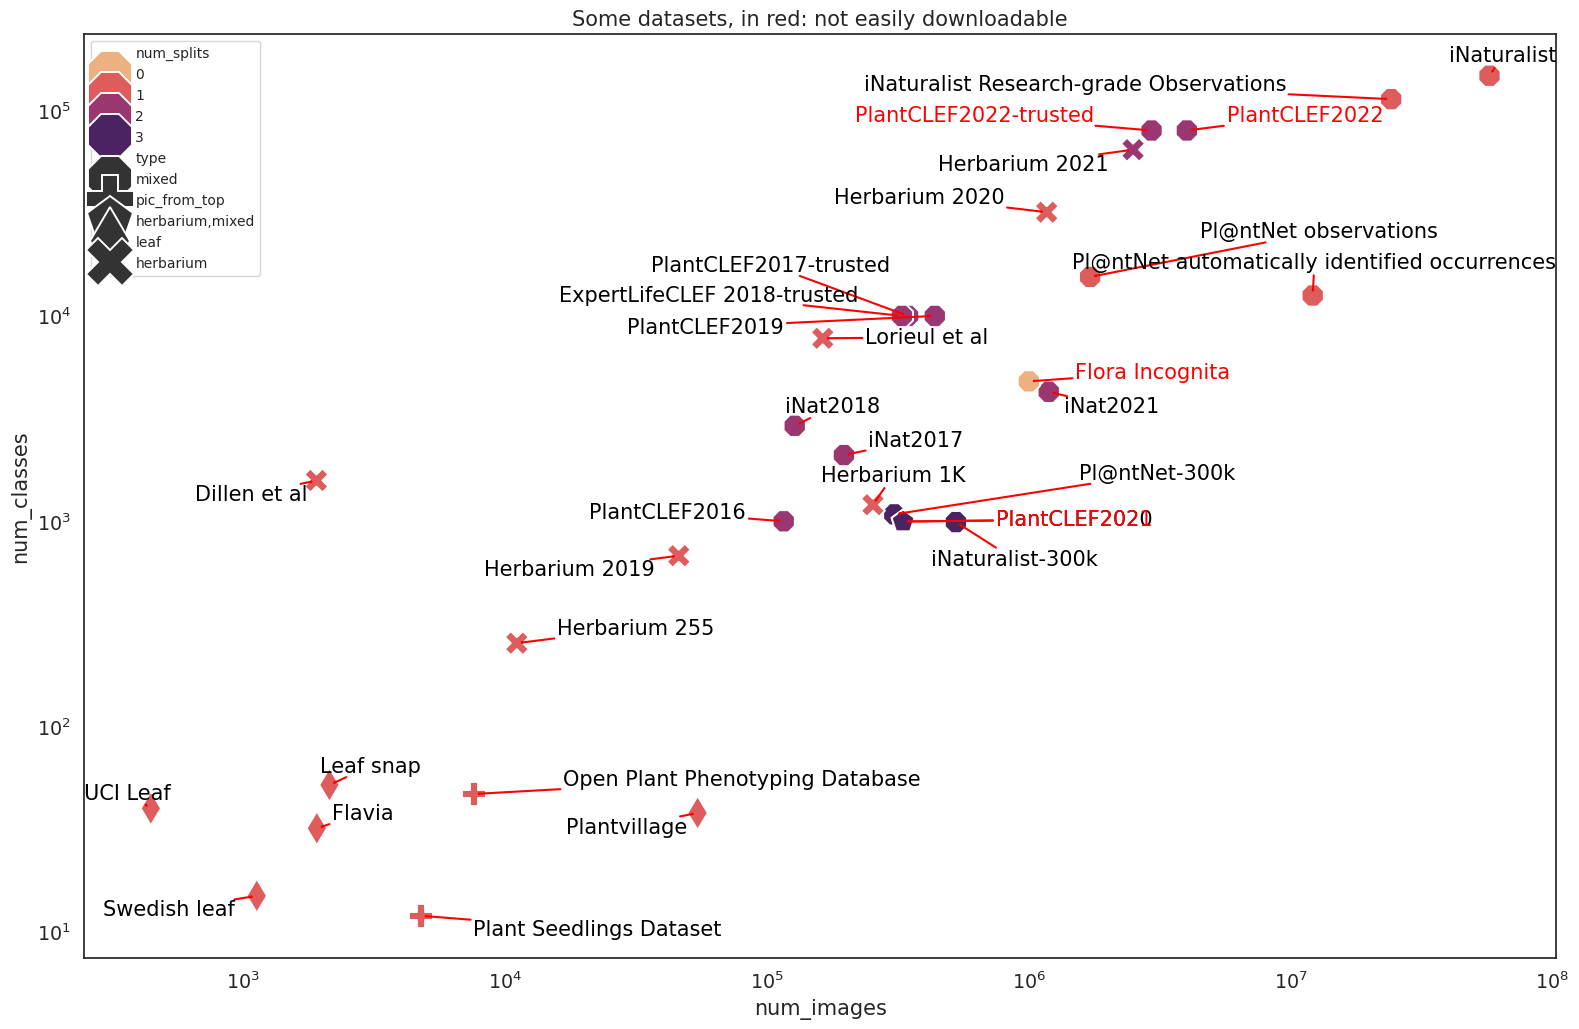

In [20]:
data = dsp
ax = sns.scatterplot(
    data=data,
    x="num_images",
    y="num_classes",
    style="type",
    hue="num_splits",
    # hue="type",
    # hue="aquisition_protocol",
    s=300,
    palette="flare",
    markers={
        "mixed": MarkerStyle("8"),
        "pic_from_top": MarkerStyle("P"),
        "herbarium": MarkerStyle("X"),
        "herbarium,mixed": MarkerStyle("p"),
        "leaf": MarkerStyle("d"),
    },
    # marker="X"
    # marker="$x$",
    # marker=MarkerStyle("*"),
    # marker=MarkerStyle("x"),
    # style="is_available",
    # markers={True: MarkerStyle("x"), False: MarkerStyle("+")},
    # legend="full",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(19, 12)

texts = list()
for i, row in data.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes,
        row["name"],
        ha="center",
        va="center",
        color="black" if row["is_available"] else "red",
    )
    texts.append(txt)

adjustText.adjust_text(
    texts,
    expand=(1.5, 1.5),
    arrowprops=dict(
        arrowstyle="->",
        # arrowstyle="-|>",
        color="red",
        lw=1.5,
    ),
)

ax.set_title("Some datasets, in red: not easily downloadable")
sns.move_legend(ax, "lower right")
ax.legend(fontsize=10, markerscale=2)

# h, l = ax.get_legend_handles_labels()
# l1 = ax.legend(
#     h[: int(len(h) / 2)], l[: int(len(l) / 2)], loc="lower right", title="t1"
# )
# l2 = ax.legend(
#     h[int(len(h) / 2) :], l[int(len(l) / 2) :], loc="center right", title="t2"
# )
# ax.add_artist(l1)  # we need this because the 2nd call to legend() erases the first

In [21]:
# Delete the not-trusted 2022 dataset
dsp.drop(index=20, inplace=True)

/tmp/ipykernel_25479/2556983625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsp.drop(index=20, inplace=True)


In [22]:
# Flora Incognita
dsp.loc[13, "num_splits"] = "N/A"

/tmp/ipykernel_25479/3609471819.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dsp.loc[13, "num_splits"] = "N/A"


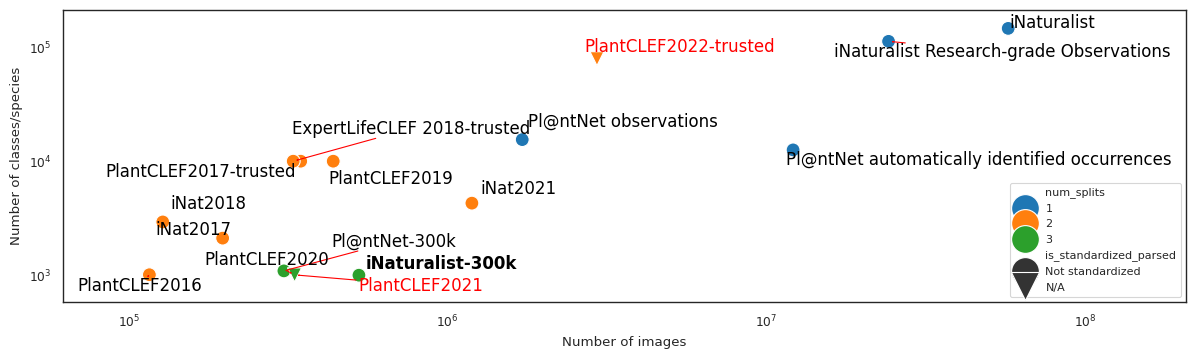

In [23]:
sns.set_context("paper")
data = dsp[dsp.num_images > 80_000]
data = data[data["type"] != "herbarium"]
data = data[data["name"] != "Flora Incognita"]

ax = sns.scatterplot(
    data=data,
    x="num_images",
    y="num_classes",
    style="is_standardized_parsed",
    hue="num_splits",
    # hue="type",
    # hue="aquisition_protocol",
    s=100,
    # palette="flare",
    palette=sns.color_palette("tab10", 3),
    # palette="bright",
    # palette=sns.color_palette("rainbow",3),
    markers={
        "Standardized": MarkerStyle("X"),
        "Not standardized": MarkerStyle("o"),
        "N/A": MarkerStyle("v"),
    },
    # marker="X"
    # marker="$x$",
    # marker=MarkerStyle("*"),
    # marker=MarkerStyle("x"),
    # style="is_available",
    # markers={True: MarkerStyle("x"), False: MarkerStyle("+")},
    # legend="full",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(19, 12)
ax.figure.set_size_inches(19, 8)
ax.figure.set_size_inches(19, 6)
ax.figure.set_size_inches(10, 5)
ax.figure.set_size_inches(15, 6)
ax.figure.set_size_inches(14, 4)
ax.figure.set_size_inches(11, 4)
ax.figure.set_size_inches(14.5, 3.8)

ax.set_ylabel("Number of classes/species")
ax.set_xlabel("Number of images")

texts = list()
for i, row in data.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes,
        # row["name"].upper(),
        row["name"],
        # row["short"],
        ha="center",
        va="center",
        # va="bottom" if row["is_available"] else "center",
        # ha="center" if row["is_available"] else "right",
        color="black" if row["is_available"] else "red",
        fontsize=12,
        fontweight="normal" if row["name"] != "iNaturalist-300k" else "bold",
    )
    texts.append(txt)

# Increase lims so there's place for text
left, right = ax.get_xlim()
ax.set_xlim(left - 15000, right + 100000000)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - 200, top + 10000)


adjustText.adjust_text(
    texts,
    # expand=(1.5, 2.0),
    # expand=(1.4, 1.4),
    # force_explode=(0.01, 0.03),
    avoid_self=True,
    force_text=(0.2, 0.7),
    force_static=(0.2, 0.4),
    min_arrow_len=10,
    time_lim=1.0,
    arrowprops=dict(
        # arrowstyle="->",
        arrowstyle="-|>",
        color="red",
        # lw=1.5,
    ),
)

# Increase lims AGAIN, now that the text is set, to create pretty white margins around them
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top + 16000)
left, right = ax.get_xlim()
ax.set_xlim(left - 8000, right + 30140000)

# ax.set_title("Some datasets, in red: not publicly available")
# sns.move_legend(ax, "lower right")
ax.legend(fontsize=8, markerscale=2, loc="lower right")

# order = [1, 2, 0, 3]
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend([handles[i] for i in order], [labels[i] for i in order])

ax.figure.savefig("dataset_sizes_plot_v2.png", bbox_inches="tight")

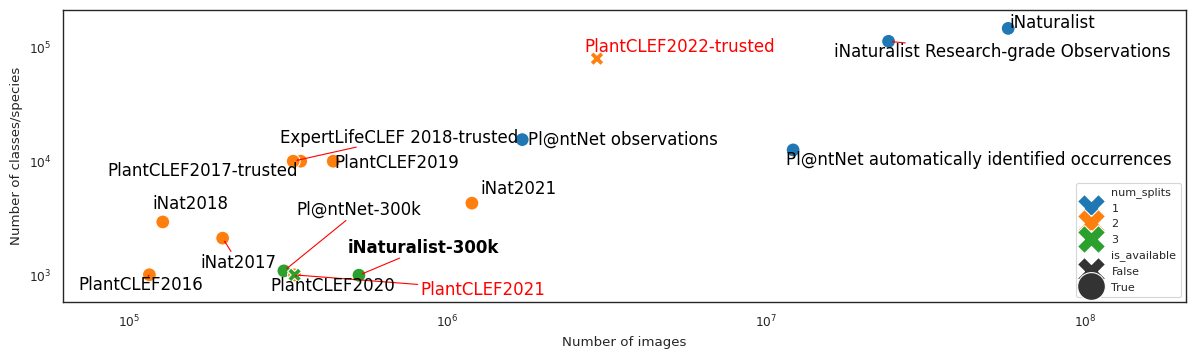

In [24]:
sns.set_context("paper")
data = dsp[dsp.num_images > 80_000]
data = data[data["type"] != "herbarium"]
data = data[data["name"] != "Flora Incognita"]

ax = sns.scatterplot(
    data=data,
    x="num_images",
    y="num_classes",
    # style="is_standardized_parsed",
    hue="num_splits",
    style="is_available",
    # hue="type",
    # hue="aquisition_protocol",
    s=100,
    # palette="flare",
    palette=sns.color_palette("tab10", 3),
    # palette="bright",
    # palette=sns.color_palette("rainbow",3),
    markers={
        False: MarkerStyle("X"),
        True: MarkerStyle("o"),
    },
    # marker="X"
    # marker="$x$",
    # marker=MarkerStyle("*"),
    # marker=MarkerStyle("x"),
    # style="is_available",
    # markers={True: MarkerStyle("x"), False: MarkerStyle("+")},
    # legend="full",
)
ax.set(xscale="log", yscale="log")
ax.figure.set_size_inches(19, 12)
ax.figure.set_size_inches(19, 8)
ax.figure.set_size_inches(19, 6)
ax.figure.set_size_inches(10, 5)
ax.figure.set_size_inches(15, 6)
ax.figure.set_size_inches(14, 4)
ax.figure.set_size_inches(11, 4)
ax.figure.set_size_inches(14.5, 3.8)

ax.set_ylabel("Number of classes/species")
ax.set_xlabel("Number of images")

texts = list()
for i, row in data.iterrows():
    txt = plt.text(
        row.num_images,
        row.num_classes - (10 if row["name"] == "PlantCLEF2020" else 0),
        # row["name"].upper(),
        row["name"],
        # row["short"],
        ha="center",
        va="center",
        # va="bottom" if row["is_available"] else "center",
        # ha="center" if row["is_available"] else "right",
        color="black" if row["is_available"] else "red",
        fontsize=12,
        fontweight="normal" if row["name"] != "iNaturalist-300k" else "bold",
    )
    texts.append(txt)

# Increase lims so there's place for text
left, right = ax.get_xlim()
ax.set_xlim(left - 15000, right + 100000000)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - 200, top + 10000)


adjustText.adjust_text(
    texts,
    # expand=(1.5, 2.0),
    # expand=(1.4, 1.4),
    # force_explode=(0.01, 0.03),
    avoid_self=True,
    force_text=(0.2, 0.7),
    force_static=(0.2, 0.4),
    min_arrow_len=10,
    time_lim=1.0,
    arrowprops=dict(
        # arrowstyle="->",
        arrowstyle="-|>",
        color="red",
        # lw=1.5,
    ),
)

# Increase lims AGAIN, now that the text is set, to create pretty white margins around them
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top + 16000)
left, right = ax.get_xlim()
ax.set_xlim(left - 8000, right + 30140000)

# ax.set_title("Some datasets, in red: not publicly available")
# sns.move_legend(ax, "lower right")
ax.legend(fontsize=8, markerscale=2, loc="lower right")

# order = [1, 2, 0, 3]
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend([handles[i] for i in order], [labels[i] for i in order])

ax.figure.savefig("dataset_sizes_plot_v2.png", bbox_inches="tight")

In [25]:
# data = dsp[dsp.num_images > 80_000]

small_cols = [
    # "name",
    "short",
    # "is_available",
    # "is_standardized_parsed",
    "num_classes",
    "training",
    "validation",
    "test",
]
small_data = data[data["type"] != "herbarium"][small_cols]
"""
small_data.is_standardized_parsed = small_data.is_standardized_parsed.replace(
    "Standardized", "Yes"
)
small_data.is_standardized_parsed = small_data.is_standardized_parsed.replace(
    "Not standardized", "No"
)
small_data.is_standardized_parsed = small_data.is_standardized_parsed.replace(
    "N/A", "N/A"
)
"""

"""
small_data[["training", "validation", "test"]] = small_data[
    ["training", "validation", "test"]
].astype("int32", errors="ignore")
small_data

small_data[["training", "validation", "test"]] = small_data[
    ["training", "validation", "test"]
].convert_dtypes(infer_objects=False)
"""
small_data

,short,num_classes,training,validation,test
0,Pl@ntNet-300k,1081.0,243916.0,31118.0,31112.0
1,Pl@ntNet observations,15490.0,1714213.0,0.0,0.0
2,Pl@ntNet autom. ident. occ.,12572.0,12142287.0,NaN,NaN
4,iNat2017,2101.0,158407.0,38206.0,0.0
5,iNat2018,2917.0,118800.0,8751.0,0.0
7,iNat2021,4271.0,1148702.0,42710.0,0.0
8,iNaturalist-300k,991.0,421294.0,52726.0,52564.0
9,iNat Research-grade,113660.0,24211423.0,0.0,0.0
10,iNaturalist,147776.0,57480960.0,0.0,0.0
14,PlantCLEF2016,1000.0,113205.0,0.0,2583.0


In [26]:
tvtn = ["training", "validation", "test", "num_classes"]
small_data[tvtn] = small_data[tvtn].applymap(lambda x: f"{x:0,.0f}")

# small_data["name"] = small_data["name"].replace("iNaturalist", "iNat", regex=True)
# small_data["name"] = small_data["name"].replace("trusted", "t", regex=True)
small_data

/tmp/ipykernel_25479/2925900304.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  small_data[tvtn] = small_data[tvtn].applymap(lambda x: f"{x:0,.0f}")


,short,num_classes,training,validation,test
0,Pl@ntNet-300k,"1,081","243,916","31,118","31,112"
1,Pl@ntNet observations,"15,490","1,714,213",0,0
2,Pl@ntNet autom. ident. occ.,"12,572","12,142,287",nan,nan
4,iNat2017,"2,101","158,407","38,206",0
5,iNat2018,"2,917","118,800","8,751",0
7,iNat2021,"4,271","1,148,702","42,710",0
8,iNaturalist-300k,991,"421,294","52,726","52,564"
9,iNat Research-grade,"113,660","24,211,423",0,0
10,iNaturalist,"147,776","57,480,960",0,0
14,PlantCLEF2016,"1,000","113,205",0,"2,583"


In [27]:
small_data[tvtn] = small_data[tvtn].replace(np.nan, "-")
small_data[tvtn] = small_data[tvtn].replace("0", "-")

# small_data[["training", "validation", "test"]].replace(np.nan, "-", inplace=True)
small_data[tvtn] = small_data[tvtn].replace("nan", "-")

small_data

,short,num_classes,training,validation,test
0,Pl@ntNet-300k,"1,081","243,916","31,118","31,112"
1,Pl@ntNet observations,"15,490","1,714,213",-,-
2,Pl@ntNet autom. ident. occ.,"12,572","12,142,287",-,-
4,iNat2017,"2,101","158,407","38,206",-
5,iNat2018,"2,917","118,800","8,751",-
7,iNat2021,"4,271","1,148,702","42,710",-
8,iNaturalist-300k,991,"421,294","52,726","52,564"
9,iNat Research-grade,"113,660","24,211,423",-,-
10,iNaturalist,"147,776","57,480,960",-,-
14,PlantCLEF2016,"1,000","113,205",-,"2,583"


In [28]:
# inaturalist-full is, well, not suitable
small_data.drop(index=10, inplace=True)

# 2022 as not available
small_data.drop(index=21, inplace=True)
# small_data.drop(index=20, inplace=True)

# Autom. ident. occ
small_data.drop(index=2, inplace=True)

# Herbaria
# small_data.drop(index=28, inplace=True)
# small_data.drop(index=30, inplace=True)
# small_data.drop(index=32, inplace=True)
# small_data.drop(index=33, inplace=True)

# Flora Inc.
# small_data.drop(index=13, inplace=True)

# 20,21
# small_data.drop(index=15, inplace=True)
# small_data.drop(index=17, inplace=True)
small_data.drop(index=18, inplace=True)

small_data

,short,num_classes,training,validation,test
0,Pl@ntNet-300k,"1,081","243,916","31,118","31,112"
1,Pl@ntNet observations,"15,490","1,714,213",-,-
4,iNat2017,"2,101","158,407","38,206",-
5,iNat2018,"2,917","118,800","8,751",-
7,iNat2021,"4,271","1,148,702","42,710",-
8,iNaturalist-300k,991,"421,294","52,726","52,564"
9,iNat Research-grade,"113,660","24,211,423",-,-
14,PlantCLEF2016,"1,000","113,205",-,"2,583"
15,PlantCLEF2017-t,"10,000","320,544",-,"25,170"
16,ExpertLifeCLEF 2018-t,"10,000","320,544",-,"6,892"


In [29]:
small_data

,short,num_classes,training,validation,test
0,Pl@ntNet-300k,"1,081","243,916","31,118","31,112"
1,Pl@ntNet observations,"15,490","1,714,213",-,-
4,iNat2017,"2,101","158,407","38,206",-
5,iNat2018,"2,917","118,800","8,751",-
7,iNat2021,"4,271","1,148,702","42,710",-
8,iNaturalist-300k,991,"421,294","52,726","52,564"
9,iNat Research-grade,"113,660","24,211,423",-,-
14,PlantCLEF2016,"1,000","113,205",-,"2,583"
15,PlantCLEF2017-t,"10,000","320,544",-,"25,170"
16,ExpertLifeCLEF 2018-t,"10,000","320,544",-,"6,892"


In [30]:
print(
    tabulate.tabulate(
        small_data,
        tablefmt="latex",
        headers=small_data.columns,
        # stralign="right",
        showindex=False,
    )
)
# print(tabulate.tabulate(small_data, floatfmt=".0f"))

\begin{tabular}{lllll}
\hline
 short                 & num\_classes   & training   & validation   & test   \\
\hline
 Pl@ntNet-300k         & 1,081         & 243,916    & 31,118       & 31,112 \\
 Pl@ntNet observations & 15,490        & 1,714,213  & -            & -      \\
 iNat2017              & 2,101         & 158,407    & 38,206       & -      \\
 iNat2018              & 2,917         & 118,800    & 8,751        & -      \\
 iNat2021              & 4,271         & 1,148,702  & 42,710       & -      \\
 iNaturalist-300k      & 991           & 421,294    & 52,726       & 52,564 \\
 iNat Research-grade   & 113,660       & 24,211,423 & -            & -      \\
 PlantCLEF2016         & 1,000         & 113,205    & -            & 2,583  \\
 PlantCLEF2017-t       & 10,000        & 320,544    & -            & 25,170 \\
 ExpertLifeCLEF 2018-t & 10,000        & 320,544    & -            & 6,892  \\
 PlantCLEF2019         & 10,000        & 434,251    & -            & 2,974  \\
 PlantCLEF2021